In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("StudentGrades.csv")
df

,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79
5,7,81
6,8,90
7,9,96
8,10,100


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
data=df.values
data[0][0]

2

In [5]:
X=[]
Y=[]
for i in range(len(data)):
    X.append(data[i][0])
    Y.append(data[i][1])
print(X)
print(Y)

[2, 3, 4, 5, 6, 7, 8, 9, 10]
[57, 66, 73, 76, 79, 81, 90, 96, 100]


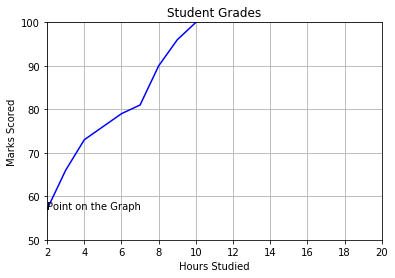

In [6]:
plt.plot(X,Y, color="blue")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Scored")
plt.title("Student Grades")
plt.axis([2,20,50,100])
plt.text(2,57,"Point on the Graph")
plt.grid()
plt.show()

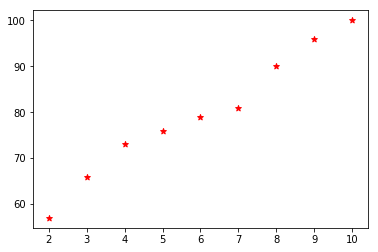

In [7]:
#scatter plots
plt.scatter(X,Y, color="red", marker="*")
plt.show()

In [8]:
import sklearn
from sklearn.linear_model import LinearRegression

In [9]:
alg1=LinearRegression()

In [10]:
X=np.array(X)
X=X.reshape(-1,1)
alg1.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
m=alg1.coef_
print(m)

[5.01666667]


In [12]:
c=alg1.intercept_
print(c)

49.67777777777776


In [13]:
alg1.predict(8)

array([89.81111111])

In [14]:
alg1.predict(5)
alg1.predict(11)

array([104.86111111])

In [15]:
m*11+c

array([104.86111111])

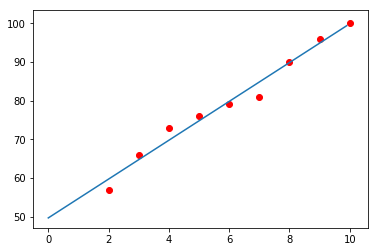

In [16]:
x_line=np.arange(0,10,0.1)
y_line=m*x_line+c
plt.plot(x_line,y_line)
plt.scatter(X,Y,color='red')
plt.show()

In [17]:
alg1.score(X,Y)

0.9757431074095346

In [18]:
def fit(X,Y):
    X=np.array(X)
    Y=np.array(Y)
    #(a-b)/(c-d)
    a=(Y*X).mean()
    b=Y.mean()*X.mean()
    c=(X**2).mean()
    d=(X.mean())**2
    
    #m_num=(Y*X).mean()-((Y.mean())*X.mean())
    #m_den=(X**2).mean()-(X.mean())**2
    m=(a-b)/(c-d)
    c=Y.mean()-m*X.mean()
    return [m,c]

In [19]:
def coef_(X,Y):
    return fit(X,Y)[0]
def intercept_(X,Y):
    return fit(X,Y)[1]

In [20]:
def predict(X,m,c):
    return m*X+c
    

In [21]:
def score(X,Y,m,c):
    X=np.array(X)
    Y=np.array(Y)
    Y_pred=predict(X,m,c)
    u=((Y-Y_pred)**2).sum()
    v=((Y-Y.mean())**2).sum()
    return 1-u/v

In [22]:
fit(X,Y)

[8.526512829121205e-15, 79.77777777777771]

In [23]:
c=intercept_(X,Y)
c

79.77777777777771

In [24]:
m=coef_(X,Y)
m

8.526512829121205e-15

In [25]:
score(X,Y,m,c)

-8.0

In [26]:
predict(7,m,c)

79.77777777777777

In [27]:
from sklearn import datasets
import numpy as np

In [28]:
data=datasets.load_breast_cancer()

In [29]:
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [30]:
import pandas as pd
X=pd.DataFrame(data.data)
X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [31]:
Y=pd.DataFrame(data.target)
Y

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,random_state=0)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf=LogisticRegression()

In [36]:
clf.fit(X_train, Y_train)

F:\application\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
Y_pred=clf.predict(X_test)
Y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [38]:
clf.score(X_test, Y_test)


0.958041958041958

In [39]:
clf.score(X_train, Y_train)
clf.predict(X).shape
y=np.array(Y).reshape(569,)
y.shape

(569,)

In [40]:
import numpy as np
pd.DataFrame(np.array(clf.predict(X))-np.array(y))

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [41]:
clf.predict_proba(X)[13]

array([0.28085106, 0.71914894])

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
Y_pred=clf.predict(X)

In [44]:
print(confusion_matrix(Y,Y_pred))

[[201  11]
 [ 12 345]]


In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(Y,Y_pred))

             precision    recall  f1-score   support

          0       0.94      0.95      0.95       212
          1       0.97      0.97      0.97       357

avg / total       0.96      0.96      0.96       569



In [47]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

In [48]:
clf2=DecisionTreeClassifier(max_depth=2)

In [49]:
clf2.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
clf2.score(X_train,Y_train)

0.9413145539906104

In [51]:
clf2.score(X_test,Y_test)

0.9230769230769231

In [53]:
from sklearn import datasets
cancer=datasets.load_breast_cancer()
X=cancer.data
Y=cancer.target

from sklearn.ensemble import RandomForestClassifier

In [66]:
rf=RandomForestClassifier(random_state=0,n_estimators=20,max_depth=4)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_Train, X_Test,Y_Train,Y_Test=train_test_split(X,Y)

In [69]:
rf.fit(X_Train,Y_Train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [70]:
rf.score(X_Train,Y_Train)

0.9906103286384976

In [71]:
rf.score(X_Test,Y_Test)

0.972027972027972

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
d_t=DecisionTreeClassifier()

In [74]:
d_t.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
d_t.score(X_Train,Y_Train)

1.0

In [76]:
d_t.score(X_Test,Y_Test)

1.0

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca=PCA()

In [81]:
X_Train_New=pca.fit_transform(X_Train)

In [82]:
X_Test_New=pca.fit_transform(X_Test)

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
lr=LogisticRegression()

In [91]:
import time

In [95]:
# Non PCA
start=time.time()
lr.fit(X_Train,Y_Train)
end=time.time()
print(lr.score(X_Test,Y_Test))
print(end-start)

0.972027972027972
0.005957603454589844


In [96]:
#  PCA
start=time.time()
lr.fit(X_Train_New,Y_Train)
end=time.time()
print(lr.score(X_Test_New,Y_Test))
print(end-start)

0.8601398601398601
0.006022453308105469


In [97]:
X_Train.shape

(426, 30)

In [99]:
X_Train_New.shape

(426, 30)

In [100]:
X_org=pca.inverse_transform(X_Train_New)

In [101]:
X_org

array([[1.41266307e+01, 1.88032902e+01, 9.12203120e+01, ...,
        6.38692648e-02, 2.56052805e-01, 7.16360701e-02],
       [1.49516442e+01, 2.04662771e+01, 9.50724497e+01, ...,
        8.08368963e-02, 2.78304995e-01, 7.18649637e-02],
       [1.82672002e+01, 2.01950298e+01, 1.18878181e+02, ...,
        1.95884434e-01, 3.03832071e-01, 7.13240136e-02],
       ...,
       [1.12820094e+01, 1.64852874e+01, 7.29973768e+01, ...,
        1.01888610e-01, 2.87665919e-01, 8.64430091e-02],
       [1.28866097e+01, 1.50861041e+01, 8.38266480e+01, ...,
        1.19668246e-01, 2.46120042e-01, 1.02416631e-01],
       [1.18068073e+01, 1.72919062e+01, 7.56481010e+01, ...,
        6.41929517e-02, 2.15979961e-01, 9.32515140e-02]])

In [102]:
X_Train

array([[1.390e+01, 1.924e+01, 8.873e+01, ..., 8.150e-02, 2.356e-01,
        7.603e-02],
       [1.684e+01, 1.946e+01, 1.084e+02, ..., 8.436e-02, 2.527e-01,
        5.972e-02],
       [2.058e+01, 2.214e+01, 1.347e+02, ..., 1.920e-01, 2.909e-01,
        5.865e-02],
       ...,
       [1.071e+01, 2.039e+01, 6.950e+01, ..., 8.600e-02, 2.605e-01,
        8.701e-02],
       [1.575e+01, 1.922e+01, 1.071e+02, ..., 2.135e-01, 4.245e-01,
        1.050e-01],
       [1.130e+01, 1.819e+01, 7.393e+01, ..., 1.218e-01, 3.308e-01,
        1.297e-01]])